<Figure size 432x288 with 0 Axes>

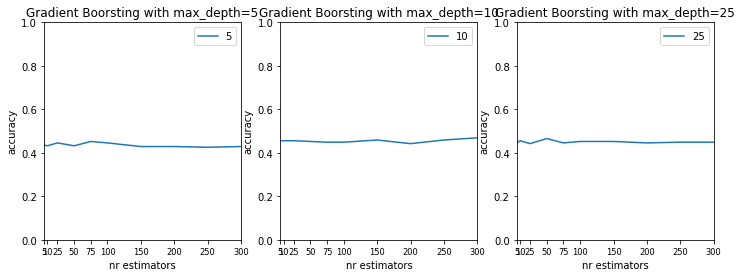

Best results with depth=10, learning rate=0.90 and 300 estimators, with accuracy=0.47


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics as metrics
from sklearn.ensemble import GradientBoostingClassifier
import sys
sys.path.append("../")
from Modules import ds_functions as ds

data: pd.DataFrame = pd.read_csv('../CD databases/heart_failure_clinical_records_dataset.csv')
y: np.ndarray = data.pop('DEATH_EVENT').values
X: np.ndarray = data.values
labels = pd.unique(y)

trnX, tstX, trnY, tstY = train_test_split(X, y, train_size=0.7, stratify=y)

n_estimators = [5, 10, 25, 50, 75, 100, 150, 200, 250, 300]
max_depths = [5, 10, 25]
learning_rate = [.1, .3, .5, .7, .9]
best = ('', 0, 0)
last_best = 0
best_tree = None

skf = StratifiedKFold(n_splits=4)
skf.get_n_splits(X, y)

cols = len(max_depths)
plt.figure()
fig, axs = plt.subplots(1, cols, figsize=(cols*ds.HEIGHT, ds.HEIGHT), squeeze=False)
for k in range(len(max_depths)):
    d = max_depths[k]
    values = {}
    for lr in learning_rate:
        yvalues_aux = []
        for n in n_estimators:
            yvalues = []
            for train_index, test_index in skf.split(X, y):
                trnX, tstX = X[train_index], X[test_index]
                trnY, tstY = y[train_index], y[test_index]
                gb = GradientBoostingClassifier(n_estimators=n, max_depth=d, learning_rate=lr)
                gb.fit(trnX, trnY)
                prdY = gb.predict(tstX)
                yvalues.append(metrics.accuracy_score(tstY, prdY))
            yvalues_aux.append(sum(yvalues) / len(yvalues))
            if yvalues_aux[-1] > last_best:
                best = (d, lr, n)
                last_best = yvalues_aux[-1]
                best_tree = gb
        values[d] = yvalues_aux
    ds.multiple_line_chart(n_estimators, values, ax=axs[0, k], title='Gradient Boorsting with max_depth=%d'%d,
                           xlabel='nr estimators', ylabel='accuracy', percentage=True)

plt.show()
print('Best results with depth=%d, learning rate=%1.2f and %d estimators, with accuracy=%1.2f'%(best[0], best[1], best[2], last_best))

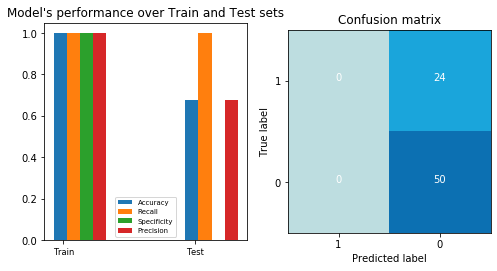

In [6]:
prd_trn = best_tree.predict(trnX)
prd_tst = best_tree.predict(tstX)
ds.plot_evaluation_results(pd.unique(y), trnY, prd_trn, tstY, prd_tst)